In [7]:
import pandas as pd
from sklearn.metrics import confusion_matrix

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')

In [8]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
print(df.info())

print(df.describe())

print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

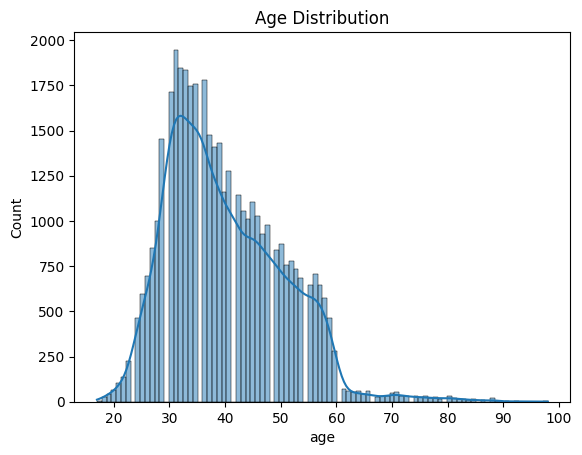

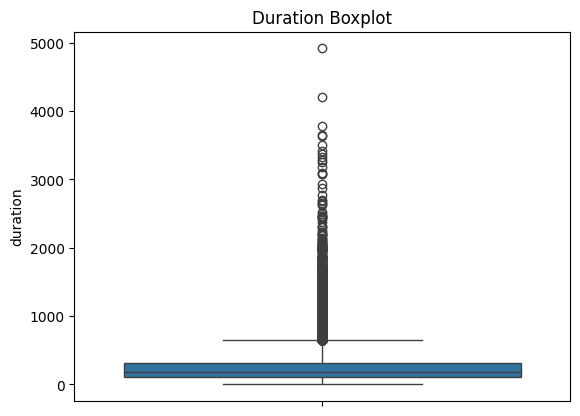

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()


sns.boxplot(y=df['duration'])
plt.title('Duration Boxplot')
plt.show()


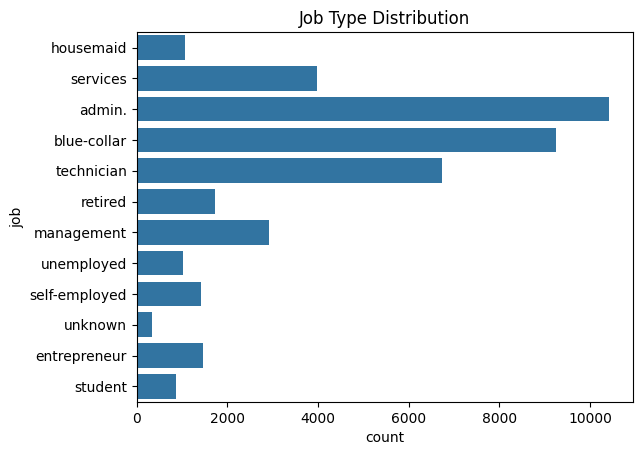

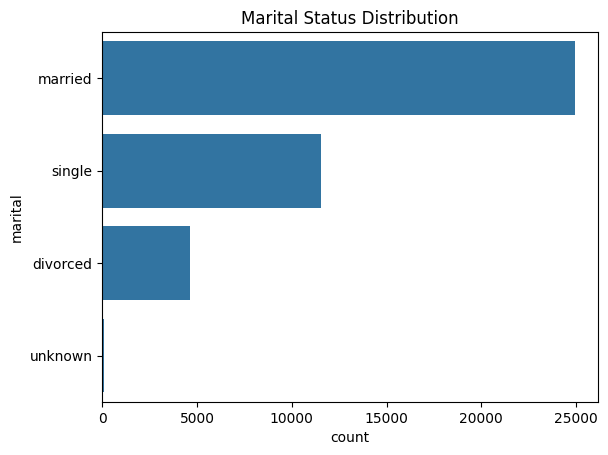

In [14]:
sns.countplot(y=df['job'])
plt.title('Job Type Distribution')
plt.show()


sns.countplot(y=df['marital'])
plt.title('Marital Status Distribution')
plt.show()


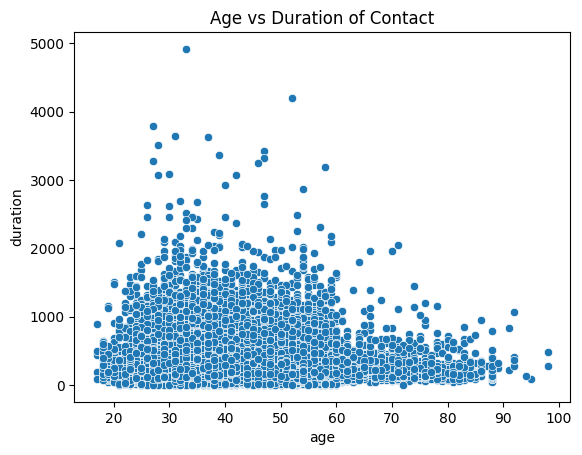

In [15]:
# Scatterplot (age vs duration)
sns.scatterplot(x=df['age'], y=df['duration'])
plt.title('Age vs Duration of Contact')
plt.show()


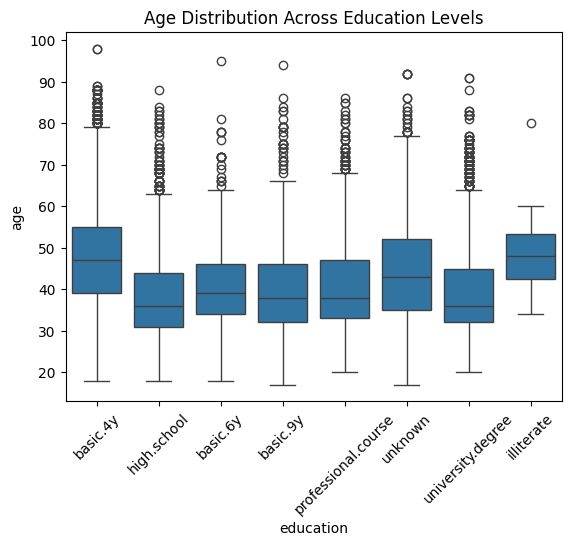

In [16]:
# Boxplot (education vs age)
sns.boxplot(x=df['education'], y=df['age'])
plt.title('Age Distribution Across Education Levels')
plt.xticks(rotation=45)
plt.show()


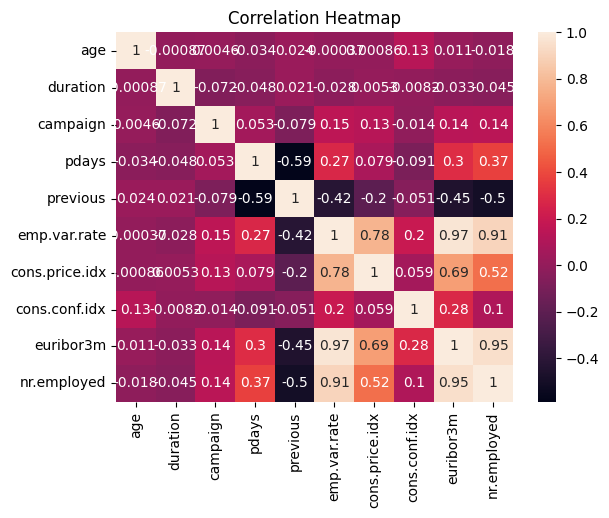

In [19]:
# Correlation heatmap for numerical variables
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()



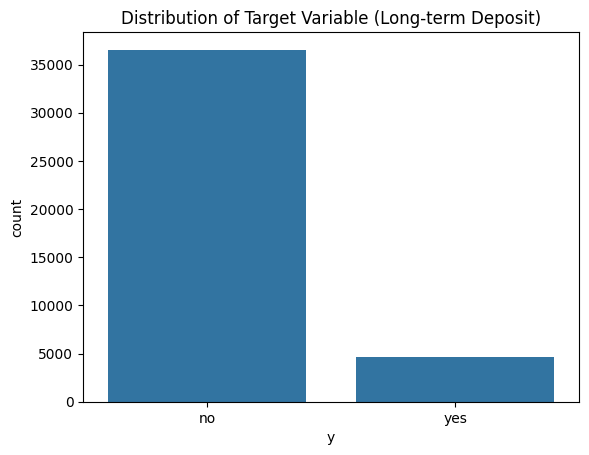

In [18]:
# Countplot for the target variable 'y'
sns.countplot(x=df['y'])
plt.title('Distribution of Target Variable (Long-term Deposit)')
plt.show()


In [20]:
from sklearn.model_selection import train_test_split


X = df.drop('y', axis=1)  # Features
y = df['y']  # Target

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure the same columns in both sets
X_train, X_test = X_train.align(X_test, join='inner', axis=1)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model with the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Additional performance metrics
print(classification_report(y_test, y_pred))


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9113862588006798
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.68      0.42      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [24]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Different algorithms
}


In [25]:
# Initialize a Logistic Regression classifier
logreg = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)


In [26]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/vscode/.local/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line s

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

In [27]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'C': 0.1, 'solver': 'newton-cg'}
Best Score: 0.9106525037936267


In [28]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.910536537994659
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7303
         yes       0.67      0.42      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238

